**1-Visualisation des donnees **

In [183]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline  # Utilisation de make_pipeline pour gérer le rééchantillonnage séparément
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours as ENN
import pandas as pd
import matplotlib.pyplot as plt
import re
%pip install nltk
import nltk
nltk.download('vader_lexicon')  # Télécharger les ressources nécessaires pour l'analyse des sentiments
nltk.download('stopwords')
import string
from nltk.corpus import stopwords #Natural Language Toolkit
from nltk import PorterStemmer as Stemmer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenevo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenevo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


head 
    Note                                     Commentaire
0     5                                Très bon produit
1     5                              je bien recommande
2     5                                   Good quality.
3     4    Il aide à fortifier les ongles et le cheveux
4     5  Il m’aide à fortifier les ongles et le cheveux
------------------------------------------------------------------------------------------
shape  (9820, 2)
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9820 entries, 0 to 9819
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Note         9820 non-null   int64 
 1   Commentaire  9819 non-null   object
dtypes: int64(1), object(1)
memory usage: 153.6+ KB
info  None
------------------------------------------------------------------------------------------
describe               Note
count 

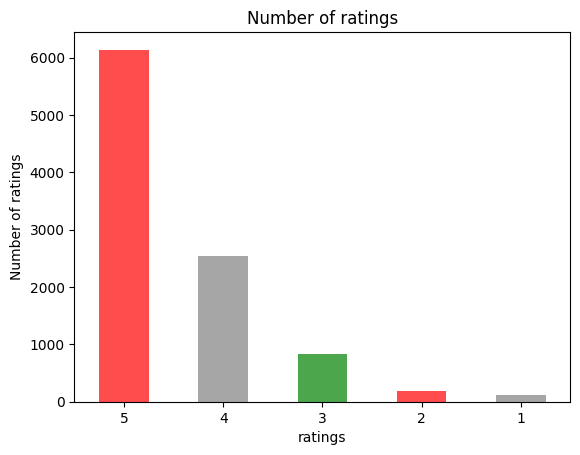

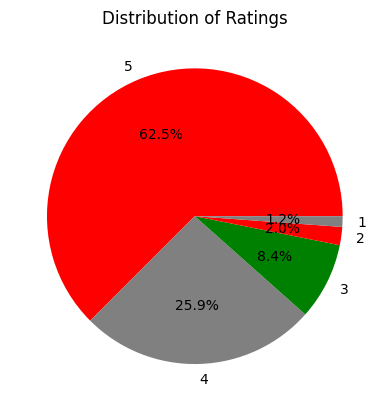

In [184]:

df = pd.read_csv('reviews_product_category2.csv', sep=';')
print("head \n",df.head())
print("------------------------------------------------------------------------------------------")
print("shape ",df.shape)
print("------------------------------------------------------------------------------------------")
print("info ",df.info())
print("------------------------------------------------------------------------------------------")
print("describe",df.describe())
print("------------------------------------------------------------------------------------------")
print("nombre des commentaires null=",df['Commentaire'].isnull().sum())
print("nombre des notes null=",df['Note'].isnull().sum())
print("nombre des doublons=",df.duplicated().sum())
count_labels = df['Note'].value_counts()
print(count_labels) 
# Bar chart
count_labels.plot(kind='bar', title='Distribution des labels' , color=['red', 'grey', 'green'],alpha=0.7)
plt.title('Number of ratings') 
plt.xlabel('ratings')
plt.ylabel('Number of ratings')
plt.xticks(rotation=0)
plt.show()
count_labels.plot(kind='pie', title='Distribution des notes', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Ratings')
plt.ylabel('')
plt.show()


In [185]:
print("shape avant suppression des valeurs manquantes et les doublons",df.shape)
df = df.dropna(subset=['Commentaire'])
# Vérifier les valeurs manquantes dans la colonne 'Commentaire'
df['Commentaire'].isnull().sum()
df['Commentaire'] = df['Commentaire'].str.lower()

# Supprimer les doublons
df = df.drop_duplicates(subset='Commentaire', keep='first')
print("shape apres suppression des valeurs manquantes et les doublons",df.shape)



shape avant suppression des valeurs manquantes et les doublons (9820, 2)
shape apres suppression des valeurs manquantes et les doublons (3027, 2)


Donc pas des valeurs manquantes, et les colonnes sont bien typées. On peut donc passer à la suite.

Clean 

In [186]:

# Définir une fonction pour supprimer les émojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["  # Range of emojis in Unicode
        "\U0001F600-\U0001F64F"  # Emoticônes (Smileys)
        "\U0001F300-\U0001F5FF"  # Symboles et pictogrammes
        "\U0001F680-\U0001F6FF"  # Transport et symboles divers
        "\U0001F700-\U0001F77F"  # Symboles supplémentaires
        "\U0001F780-\U0001F7FF"  # Supp. Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supp. Arrows-C, Extended-C
        "\U0001F900-\U0001F9FF"  # Supp. Arrows-D, Objects
        "\U0001FA00-\U0001FA6F"  # Chess, symbols, new emojis
        "\U0001FA70-\U0001FAFF"  # Symbols and pictograms extended
        "\U00002702-\U000027B0"  # Divers symboles et pictogrammes
        "\U000024C2-\U0001F251"  # Autres symboles divers
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)  # Remplacer par une chaîne vide

# Appliquer la fonction à la colonne 'Commentaire'
df['Commentaire'] = df['Commentaire'].apply(remove_emojis)
# Vérifier les chaînes vides ou contenant uniquement des espaces dans la colonne 'Commentaire'
empty_strings = df['Commentaire'].str.strip() == ''  # 'strip()' supprime les espaces avant et après
num_empty_strings = (df['Commentaire'].str.strip() == '').sum()
print(f"Nombre de chaînes vides avant : {num_empty_strings}")

# Supprimer les lignes où 'Commentaire' est vide ou uniquement composé d'espaces
df_cleaned = df[df['Commentaire'].str.strip() != '']

num_empty_strings = (df_cleaned['Commentaire'].str.strip() == '').sum()
print(f"Nombre de chaînes vides apres : {num_empty_strings}")
print("shape apres suppression emojis et chaines vides",df_cleaned.shape)

df_cleaned=df_cleaned.reset_index(drop=True)
print("J'adore ce produit !! 😊")
print("j'adore ce produit")




Nombre de chaînes vides avant : 100
Nombre de chaînes vides apres : 0
shape apres suppression emojis et chaines vides (2927, 2)
J'adore ce produit !! 😊
j'adore ce produit


**Label**

   Note                                     Commentaire    Label
0     5                                très bon produit  Positif
1     5                              je bien recommande  Positif
2     5                                   good quality.  Positif
3     4    il aide à fortifier les ongles et le cheveux  Positif
4     5  il m’aide à fortifier les ongles et le cheveux  Positif
Label
Positif    2751
Neutre      112
Négatif      64
Name: count, dtype: int64


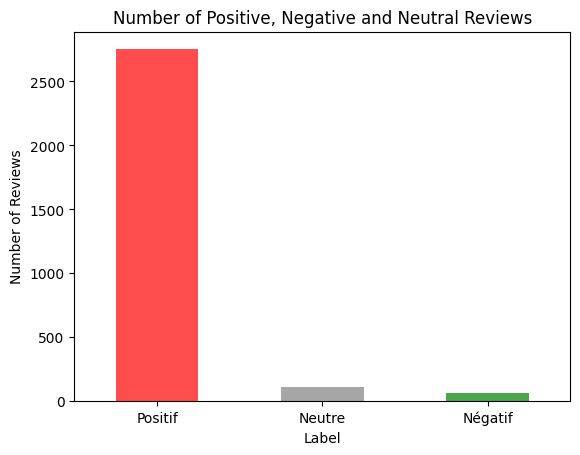

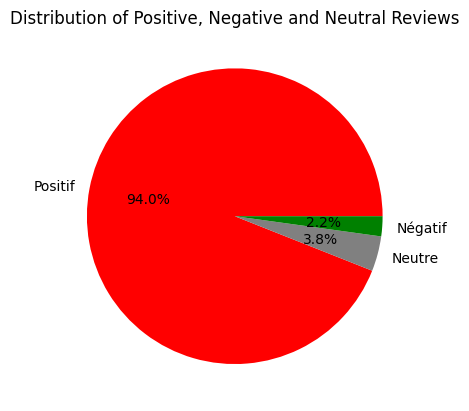

In [187]:

def assign_label(note):
    if note == 1:
        return 'Négatif'
    elif note == 2:
        return 'Neutre'
    else:
        return 'Positif'
df_cleaned['Label'] = df_cleaned['Note'].apply(assign_label)
print(df_cleaned.head())
count_labels = df_cleaned['Label'].value_counts()
print(count_labels) 
# Bar chart
count_labels.plot(kind='bar', title='Distribution des labels' , color=['red', 'grey', 'green'],alpha=0.7)
plt.title('Number of Positive, Negative and Neutral Reviews') 
plt.xlabel('Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()
# Pie chart
count_labels.plot(kind='pie', title='Distribution des labels', autopct='%1.1f%%', colors=['red', 'grey', 'green'])
plt.title('Distribution of Positive, Negative and Neutral Reviews')
plt.ylabel('')
plt.show()

In [188]:

def process(text):#rend le texte en minuscule, supprime la ponctuation, les mots vides et applique le stemming (forme de jetons)
# lowercase it
  text = text.lower()
# remove punctuation
  text = ''.join([t for t in text if t not in string.punctuation])
# remove stopwords
  text = [t for t in text.split() if t not in stopwords.words('english')]
# stemming
  st = Stemmer()
  text = [st.stem(t) for t in text]
# return token list
  return text
# Testing
print("holiday and playing cricket. Jeff is playing very well!!!")
print(process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!'))
# Test avec notre dataset
print(df_cleaned['Commentaire'][:2].apply(process))

holiday and playing cricket. Jeff is playing very well!!!
['holiday', 'play', 'cricket', 'jeff', 'play', 'well']
0      [trè, bon, produit]
1    [je, bien, recommand]
Name: Commentaire, dtype: object


In [189]:

tfidfv = TfidfVectorizer(analyzer=process)#construit une matrice sparse où chaque élément est le score TF-IDF d'un terme dans un document.
data = tfidfv.fit_transform(df_cleaned['Commentaire'])#renvoie une matrice sparse contenant les scores TF-IDF pour chaque document.
com = df_cleaned.iloc[2]['Commentaire']#ligne est un document et chaque mot de commentaire est un terme.
print(com)
print(tfidfv.transform([com]))#transforme le message sélectionné en une matrice sparse contenant les scores TF-IDF des termes du message (par rapport à tout le corpus)
print("Le terme d'indice 820 dans le vocabulaire a un score TF-IDF de 0.7147 dans le texte com.\nCela signifie que ce terme est relativement important dans le document car il a une valeur élevée.")
#visualiser
j = tfidfv.transform([com]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
   if j[i] != 0:# sélectionne uniquement les termes avec des scores TF-IDF non nuls.
     print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'),
tfidfv.get_feature_names_out()[i],sep='\t')#tfidfv.get_feature_names_out() : retourne la liste des termes du vocabulaire, alignés sur les indices de la matrice.
# TFLa fréquence du terme mesure la fréquence d'apparition d'un mot dans un document spécifique.
# IDF La fréquence inverse des documents mesure la rareté d’un mot dans tout le corpus. Plus un mot est courant dans plusieurs documents, plus son importance est faible.
# TF-IDF évaluer l'importance d'un terme dans un document, en tenant compte de sa fréquence relative dans le document (TF) et de sa rareté dans le corpus

good quality.
  (0, 1733)	0.7794224021316158
  (0, 877)	0.6264987781754899
Le terme d'indice 820 dans le vocabulaire a un score TF-IDF de 0.7147 dans le texte com.
Cela signifie que ce terme est relativement important dans le document car il a une valeur élevée.
index	idf	tfidf	term
877	4.1781	0.6265	good
1733	5.1979	0.7794	qualiti


In [190]:
########### TRAIN ############

reviwes_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())   # train on TFIDF vectors with NB
])
x_train, x_test, y_train, y_test = train_test_split(df_cleaned['Commentaire'],df_cleaned['Label'], test_size=0.20, random_state = 21)
reviwes_filter.fit(x_train, y_train)

######## TEST ##############
predictions = reviwes_filter.predict(x_test)
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_test))
print('Number of wrong of predictions', count)

Total number of test cases 586
Number of wrong of predictions 33


In [191]:
# Filtrer les prédictions erronées classées comme '+' (mais qui étaient en réalité '-')
incorrect_positive_predictions = df_cleaned.iloc[y_test.index][(y_test != predictions) & (predictions == 'Positif')]
# Afficher les messages erronés classés comme 'positive'
print("Predictions erronées classées comme 'positive':")
print(incorrect_positive_predictions)


Predictions erronées classées comme 'positive':
      Note                                        Commentaire    Label
1845     1                                       non pour moi  Négatif
1194     1                                             nonnnn  Négatif
1536     2                       ليس الافضل ولكنه يساعد قليلا   Neutre
817      2                good quality pazejfoipj sé ba3bousa   Neutre
1359     1                      je l’ai pas aimé mustela khir  Négatif
816      2                 good quality pazejfoipj é ba3bousa   Neutre
1652     2                   dentifrice comme tous les autres   Neutre
920      1                                               flop  Négatif
2046     2                          tal3li 7boub ta7t l jelda   Neutre
2867     2                                    average quality   Neutre
2014     1                         pas pour les peaux grasses  Négatif
68       2                                            parfait   Neutre
1885     1  très cher pour so

              precision    recall  f1-score   support

      Neutre       0.00      0.00      0.00         0
     Négatif       0.00      0.00      0.00         0
     Positif       1.00      0.94      0.97       586

    accuracy                           0.94       586
   macro avg       0.33      0.31      0.32       586
weighted avg       1.00      0.94      0.97       586



c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

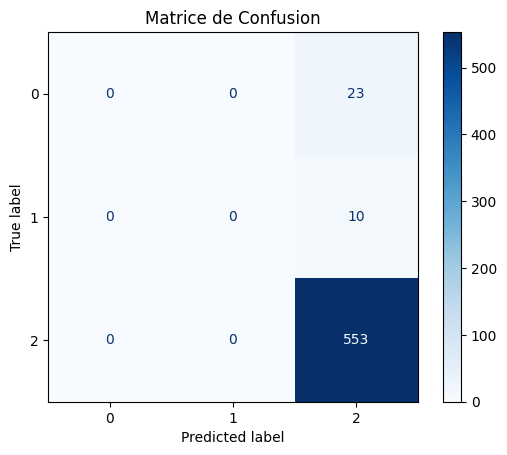

In [192]:
print(classification_report(predictions, y_test))
# Matrice de confusion
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()

Equilibrage 

Total number of test cases: 586
Number of wrong predictions: 138
              precision    recall  f1-score   support

           0       0.06      0.26      0.10        23
           1       0.12      0.40      0.19        10
           2       0.97      0.79      0.87       553

    accuracy                           0.76       586
   macro avg       0.38      0.48      0.38       586
weighted avg       0.92      0.76      0.83       586



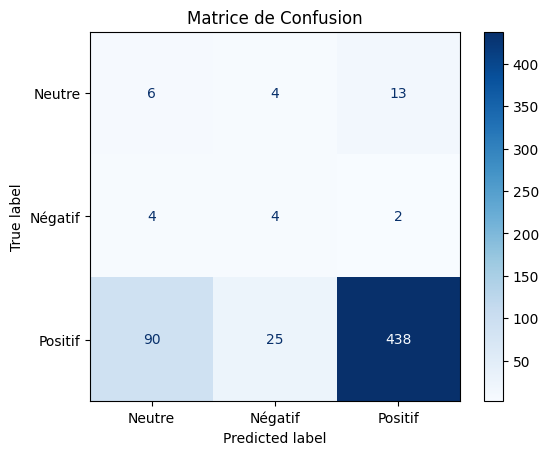

In [193]:


# Transformation des labels en entiers
label_encoder = LabelEncoder()
df_cleaned['Label'] = label_encoder.fit_transform(df_cleaned['Label'])  # Utilisation de 'Label' pour encoder

# Séparation des données en jeu d'entraînement et test
x_train, x_test, y_train, y_test = train_test_split(df_cleaned['Commentaire'], df_cleaned['Label'], test_size=0.20, random_state=21)

# Création d'un pipeline incluant un vectorizer et un classifieur
vectorizer = TfidfVectorizer(analyzer=process)

# Appliquer SMOTE après la vectorisation
# Utilisation de la classe ImbPipeline qui permet de gérer SMOTE
reviwes_filter_equi = ImbPipeline([
    ('vectorizer', vectorizer),
    ('smote', SMOTE(sampling_strategy='not majority', random_state=42)),  # Application de SMOTE
    ('classifier', MultinomialNB())  # Classifier Naive Bayes
])

# Entraîner le modèle
reviwes_filter_equi.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
predictions = reviwes_filter_equi.predict(x_test)

# Compter les prédictions incorrectes
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1

# Affichage des résultats
print('Total number of test cases:', len(y_test))
print('Number of wrong predictions:', count)

# Affichage du rapport de classification
print(classification_report(y_test, predictions))

# Matrice de confusion
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()

SMOTE + ENN

Total number of test cases: 586
Number of wrong predictions: 114
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.07      0.70      0.12        10
           2       0.96      0.84      0.90       553

    accuracy                           0.81       586
   macro avg       0.34      0.51      0.34       586
weighted avg       0.91      0.81      0.85       586



c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

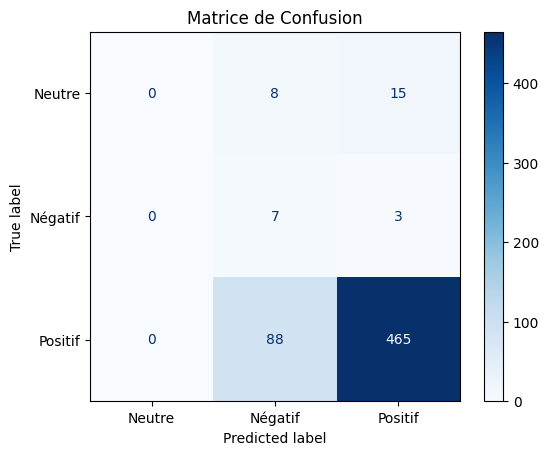

In [194]:


# Préparation des données
x_train, x_test, y_train, y_test = train_test_split(df_cleaned['Commentaire'], df_cleaned['Label'], test_size=0.20, random_state=21)

# Créer une instance de TfidfVectorizer pour transformer les commentaires en vecteurs
vectorizer = TfidfVectorizer(analyzer=process)

# Transformer les commentaires en vecteurs TF-IDF
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Appliquer SMOTE + ENN pour le rééchantillonnage sur les données transformées
smote_enn = SMOTEENN(sampling_strategy='minority', random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x_train_tfidf, y_train)

# Créer un pipeline pour la classification avec Naive Bayes
reviwes_filter_equi = make_pipeline(
    MultinomialNB()  # Utilisation de Naive Bayes pour la classification
)

# Entraîner le modèle avec les données rééchantillonnées
reviwes_filter_equi.fit(x_resampled, y_resampled)

# Prédictions sur l'ensemble de test
predictions = reviwes_filter_equi.predict(x_test_tfidf)

# Calculer et afficher les métriques de classification
print('Total number of test cases:', len(y_test))
print('Number of wrong predictions:', (y_test != predictions).sum())

# Affichage du rapport de classification
print(classification_report(y_test, predictions))


# Matrice de confusion
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()


Total number of test cases: 586
Number of wrong predictions: 150
              precision    recall  f1-score   support

           0       0.08      0.45      0.14        20
           1       0.03      0.10      0.04        10
           2       0.97      0.77      0.86       556

    accuracy                           0.74       586
   macro avg       0.36      0.44      0.35       586
weighted avg       0.93      0.74      0.82       586



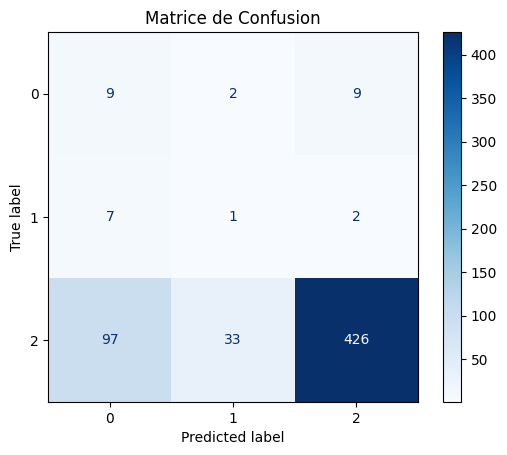

In [195]:

label_encoder = LabelEncoder()
df_cleaned['Label'] = label_encoder.fit_transform(df_cleaned['Label'])

# Séparer les caractéristiques (Commentaire) et les labels (Label)
X = df_cleaned['Commentaire']
y = df_cleaned['Label']

# Convertir les commentaires en vecteurs numériques avec TfidfVectorizer
vectorizer = TfidfVectorizer()

# Séparer les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer SMOTENC
# Pour SMOTENC, nous devons spécifier quelles caractéristiques sont catégorielles. Par exemple, dans ce cas,
# nous indiquons que la seule caractéristique (les commentaires) est catégorielle (index 0).
smote_nc = SMOTENC(categorical_features=[0], random_state=42)

# Transformer les données d'entraînement avec SMOTENC
X_train_resampled, y_train_resampled = smote_nc.fit_resample(vectorizer.fit_transform(X_train).toarray(), y_train)

# Créer un modèle Naive Bayes
model = MultinomialNB()

# Entraîner le modèle sur les données rééchantillonnées
model.fit(X_train_resampled, y_train_resampled)

# Prédictions sur l'ensemble de test
predictions = model.predict(vectorizer.transform(X_test).toarray())

# Calcul des erreurs
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print(f'Total number of test cases: {len(y_test)}')
print(f'Number of wrong predictions: {count}')

print(classification_report(y_test, predictions))
# Matrice de confusion
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()
